# ALP Group 14

---------------------------------------------

Wilbert Bryan Wibowo - 0706022210017

I Wayan Rangga Rijasa - 0706022210019

### Metadata
The Airlines Customer Satisfaction dataset provides insights into passenger experiences with various airlines, focusing on factors influencing their satisfaction levels. It includes demographic details, flight characteristics, service quality ratings, and operational metrics such as delays. The dataset is commonly used to analyze patterns, predict satisfaction levels, and guide improvements in customer service and operational efficiency. This data is valuable for airlines aiming to enhance passenger experiences and build loyalty.

1. Gender: male or female
2. Customer type: loyal or non-loyal airline customer
3. Age: the actual age of the passenger
4. Type of travel: the purpose of the passenger's flight (personal or business travel)
5. Class: business, economy, economy plus
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)
9. Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)
10. Gate location: level of satisfaction with the gate location (0: not rated; 1-5)
11. Food and drink: food and drink satisfaction level (0: not rated; 1-5)
12. Online boarding: satisfaction level with online boarding (0: not rated; 1-5)
13. Seat comfort: seat satisfaction level (0: not rated; 1-5)
14. Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
15. On-board service: level of satisfaction with on-board service (0: not rated; 1-5)
16. Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)
17. Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)
18. Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)
19. Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)
20. Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)
21. Departure delay in minutes: Minutes delayed when departure
22. Arrival delay in minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level(Satisfaction or dissatisfaction)




### Data Preparation

In [ ]:
!pip install kneed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN

In [ ]:
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)      # Remove width constraint
pd.set_option('display.max_colwidth', None) # Ensure columns show full width

In [ ]:
df = pd.read_csv('https://github.com/RanggaRijasa/DataMining2024/raw/refs/heads/main/Invistico_Airline.csv')
df.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
columns_to_check = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]

for column in columns_to_check:
    print(f"Unique values in '{column}': {df[column].unique()}")


Unique values in 'satisfaction': ['satisfied' 'dissatisfied']
Unique values in 'Gender': ['Female' 'Male']
Unique values in 'Customer Type': ['Loyal Customer' 'disloyal Customer']
Unique values in 'Type of Travel': ['Personal Travel' 'Business travel']
Unique values in 'Class': ['Eco' 'Business' 'Eco Plus']


### Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
df.isnull().sum()

,0
satisfaction,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0


In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

# insert missing values using mean from arrival delay

<ipython-input-88-7aa46badcb77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
satisfaction,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0


### Data Transformation

In [ ]:
label_encoders = {}
encoded_data = df.copy()

for column in ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    print(f"Label encoding for '{column}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Create a new DataFrame with original and encoded data combined
df_combined = encoded_data
df_combined.head()

Label encoding for 'satisfaction': {'dissatisfied': 0, 'satisfied': 1}
Label encoding for 'Gender': {'Female': 0, 'Male': 1}
Label encoding for 'Customer Type': {'Loyal Customer': 0, 'disloyal Customer': 1}
Label encoding for 'Type of Travel': {'Business travel': 0, 'Personal Travel': 1}
Label encoding for 'Class': {'Business': 0, 'Eco': 1, 'Eco Plus': 2}


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
columns_to_check = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]

for column in columns_to_check:
    print(f"Unique values in '{column}': {df_combined[column].unique()}")


Unique values in 'satisfaction': [1 0]
Unique values in 'Gender': [0 1]
Unique values in 'Customer Type': [0 1]
Unique values in 'Type of Travel': [1 0]
Unique values in 'Class': [1 0 2]


In [ ]:
# Drop the 'Satisfaction' column before scaling
df_combined_no_satisfaction = df_combined.drop(columns=['satisfaction'])

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_combined_no_satisfaction)
df_scaled = pd.DataFrame(df_scaled, columns=df_combined_no_satisfaction.columns)
df_scaled.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,-0.985340,-0.473422,1.691351,1.493951,0.653608,-1.671103,-2.037791,-1.95823,-1.975443,-0.758383,-0.947163,0.458022,-1.163181,-0.361613,-0.365962,-2.697605,-0.601544,1.316217,-0.612761,-1.041485,-0.386481,-0.392924
1,1.014878,-0.473422,0.500820,1.493951,-0.955724,0.469852,-2.037791,-1.95823,-1.975443,0.007334,-2.463679,-1.027802,-1.163181,-0.361613,0.420925,0.397840,0.263150,-1.063645,-0.612761,-1.041485,7.756204,7.548283
2,-0.985340,-0.473422,-1.615680,1.493951,0.653608,0.152458,-2.037791,-1.95823,-1.975443,0.007334,-0.947163,-2.513627,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.386481,-0.392924
3,-0.985340,-0.473422,1.360648,1.493951,0.653608,-1.322552,-2.037791,-1.95823,-1.975443,0.007334,-0.188905,0.458022,-0.397781,-1.893529,-1.939736,-2.697605,-2.330931,0.522929,-2.349219,-0.271490,-0.386481,-0.392924
4,-0.985340,-0.473422,2.022054,1.493951,0.653608,-1.584452,-2.037791,-1.95823,-1.975443,0.007334,0.569353,-0.284890,0.367620,-1.127571,-1.152849,-2.697605,-1.466238,0.522929,-1.480990,1.268500,-0.386481,-0.392924


### Exploratory Data Analysis

In [ ]:
df_scaled.describe()

# Displays the distribution of normalized data.
# Class indicate 50% percentile many people choose business class in the dataset.
# For the delays, The minimum values, approximately -0.39, indicate no significant early departures or arrivals.
# The maximum values, around 41, highlight substantial delays for some flights. Meanwhile, the median values, close to -0.39,
# suggest that the majority of flights experienced little to no delays.

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,129880.000000,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05
mean,-1.805352e-17,7.002577e-18,-1.155425e-16,8.403092e-17,7.002577e-18,1.015374e-16,6.652448e-17,-1.668583e-16,-4.201546e-17,-5.941249e-17,-5.602062e-17,0.000000,1.820670e-16,1.680618e-16,-1.680618e-16,-4.201546e-17,-2.520928e-16,-5.251933e-17,1.190438e-16,-1.260464e-16,1.641229e-17,-2.297721e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-9.853400e-01,-4.734218e-01,-2.144805e+00,-6.693658e-01,-9.557235e-01,-1.880428e+00,-2.037791e+00,-1.958230e+00,-1.975443e+00,-2.289818e+00,-2.463679e+00,-2.513627,-2.693982e+00,-2.659487e+00,-2.726622e+00,-2.697605e+00,-2.330931e+00,-2.650220e+00,-3.217449e+00,-2.581476e+00,-3.864811e-01,-3.929238e-01
25%,-9.853400e-01,-4.734218e-01,-8.219928e-01,-6.693658e-01,-9.557235e-01,-6.059799e-01,-6.020176e-01,-6.486598e-01,-5.901365e-01,-7.583833e-01,-9.471627e-01,-1.027802,-3.977808e-01,-1.127571e+00,-3.659618e-01,-1.149883e+00,-6.015440e-01,-2.703578e-01,-6.127608e-01,-1.041485e+00,-3.864811e-01,-3.929238e-01
50%,-9.853400e-01,-4.734218e-01,3.783531e-02,-6.693658e-01,6.536083e-01,-5.492008e-02,1.158689e-01,6.125377e-03,1.025167e-01,7.334096e-03,-1.889048e-01,0.458022,3.676197e-01,4.043454e-01,4.209251e-01,3.978403e-01,2.631497e-01,-2.703578e-01,2.554685e-01,4.985049e-01,-3.864811e-01,-3.929238e-01
75%,1.014878e+00,-4.734218e-01,7.653821e-01,1.493951e+00,6.536083e-01,5.477408e-01,8.337554e-01,6.609105e-01,7.951700e-01,7.730515e-01,5.693532e-01,0.458022,1.133020e+00,1.170303e+00,4.209251e-01,1.171702e+00,1.127843e+00,5.229295e-01,1.123698e+00,4.985049e-01,-7.128035e-02,-5.444618e-02
max,1.014878e+00,2.112281e+00,3.014163e+00,1.493951e+00,2.262940e+00,4.838414e+00,1.551642e+00,1.315696e+00,1.487823e+00,1.538769e+00,1.327611e+00,1.200935,1.133020e+00,1.170303e+00,1.207812e+00,1.171702e+00,1.127843e+00,1.316217e+00,1.123698e+00,1.268500e+00,4.143015e+01,4.084928e+01


<ipython-input-94-71b4003d452f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis")


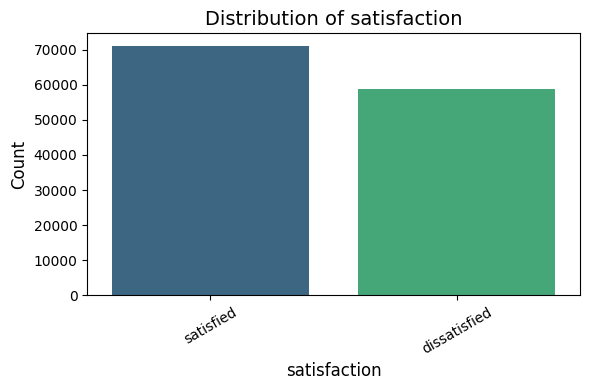

<ipython-input-94-71b4003d452f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis")


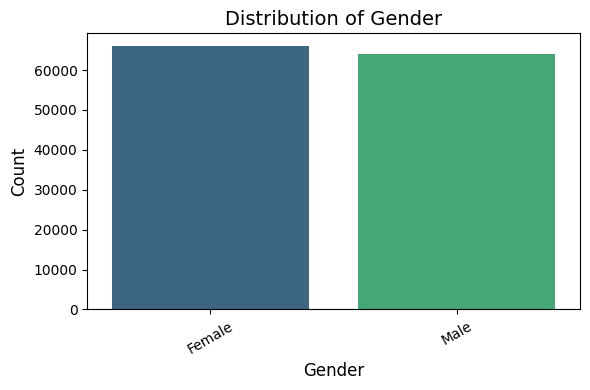

<ipython-input-94-71b4003d452f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis")


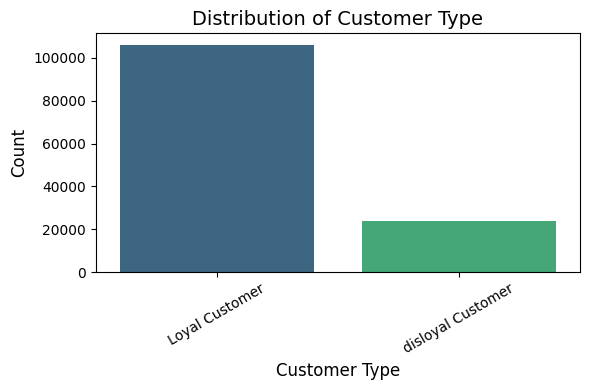

<ipython-input-94-71b4003d452f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis")


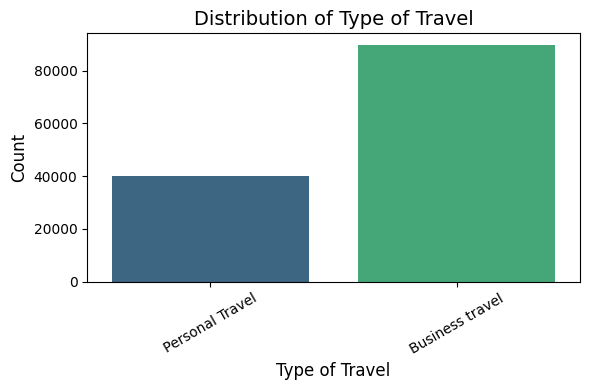

<ipython-input-94-71b4003d452f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis")


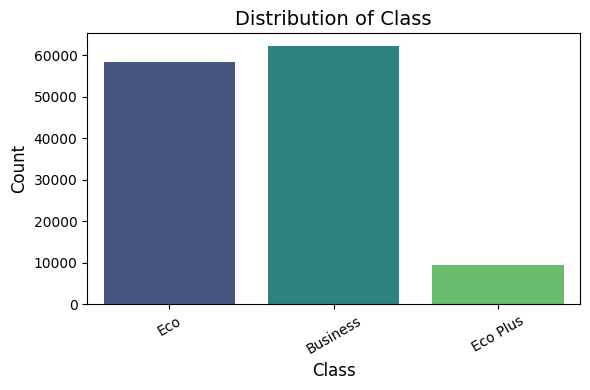

In [ ]:
## Exploring categorical features in the dataset by visualizing their distributions.

categorical_features = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, palette="viridis")
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30, fontsize=10)
    plt.tight_layout()
    plt.show()



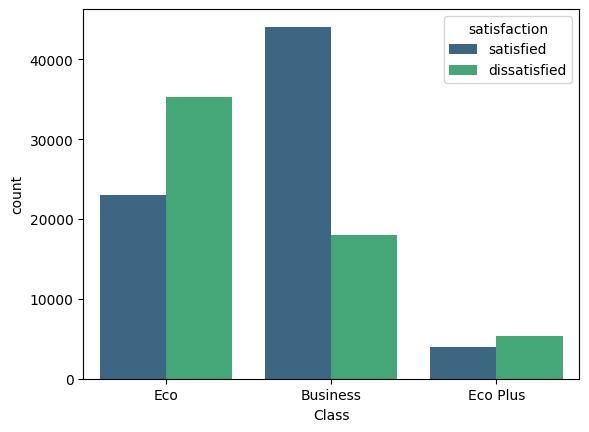

In [ ]:
sns.countplot(x = 'Class', hue = 'satisfaction',palette="viridis" , data = df)
plt.show()
# The majority of passengers in economy plus or economy class were dissatisfied with their flight
# while those who fly in business class were satisfied.

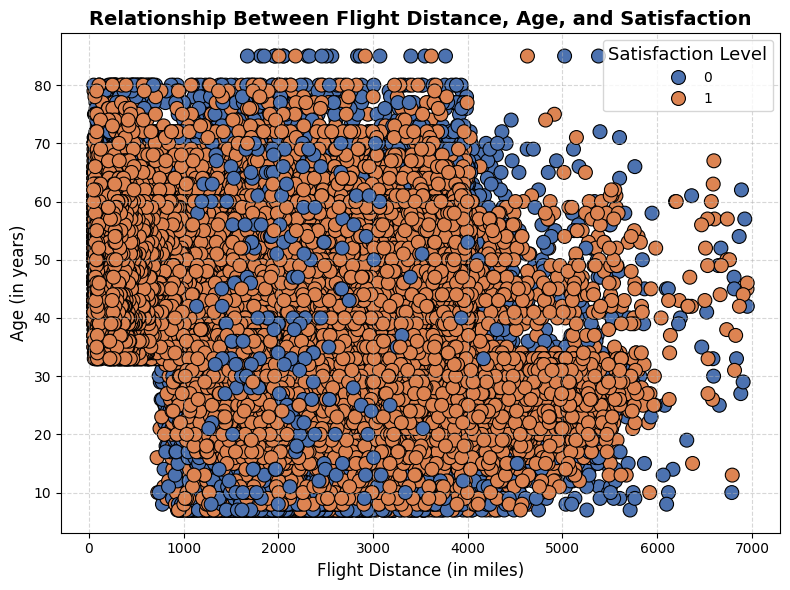

This visualization suggests that passenger satisfaction is not directly tied to age or flight distance alone. Other factors, such as service quality, travel class, or overall experience, may play a more significant role.


In [ ]:
## Relationship Between Flight Distance, Age, and Satisfaction

# 1 = Satisfied , 0 = Disatisfied
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df_combined, x="Flight Distance", y="Age", hue="satisfaction",
                palette="deep", s=100, edgecolor='black', alpha=1)
plt.title("Relationship Between Flight Distance, Age, and Satisfaction", fontsize=14, fontweight='bold')
plt.xlabel("Flight Distance (in miles)", fontsize=12)
plt.ylabel("Age (in years)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Satisfaction Level", title_fontsize='13', loc='upper right')
plt.tight_layout()
plt.show()

print("This visualization suggests that passenger satisfaction is not directly tied to age or flight distance alone. Other factors, such as service quality, travel class, or overall experience, may play a more significant role.")

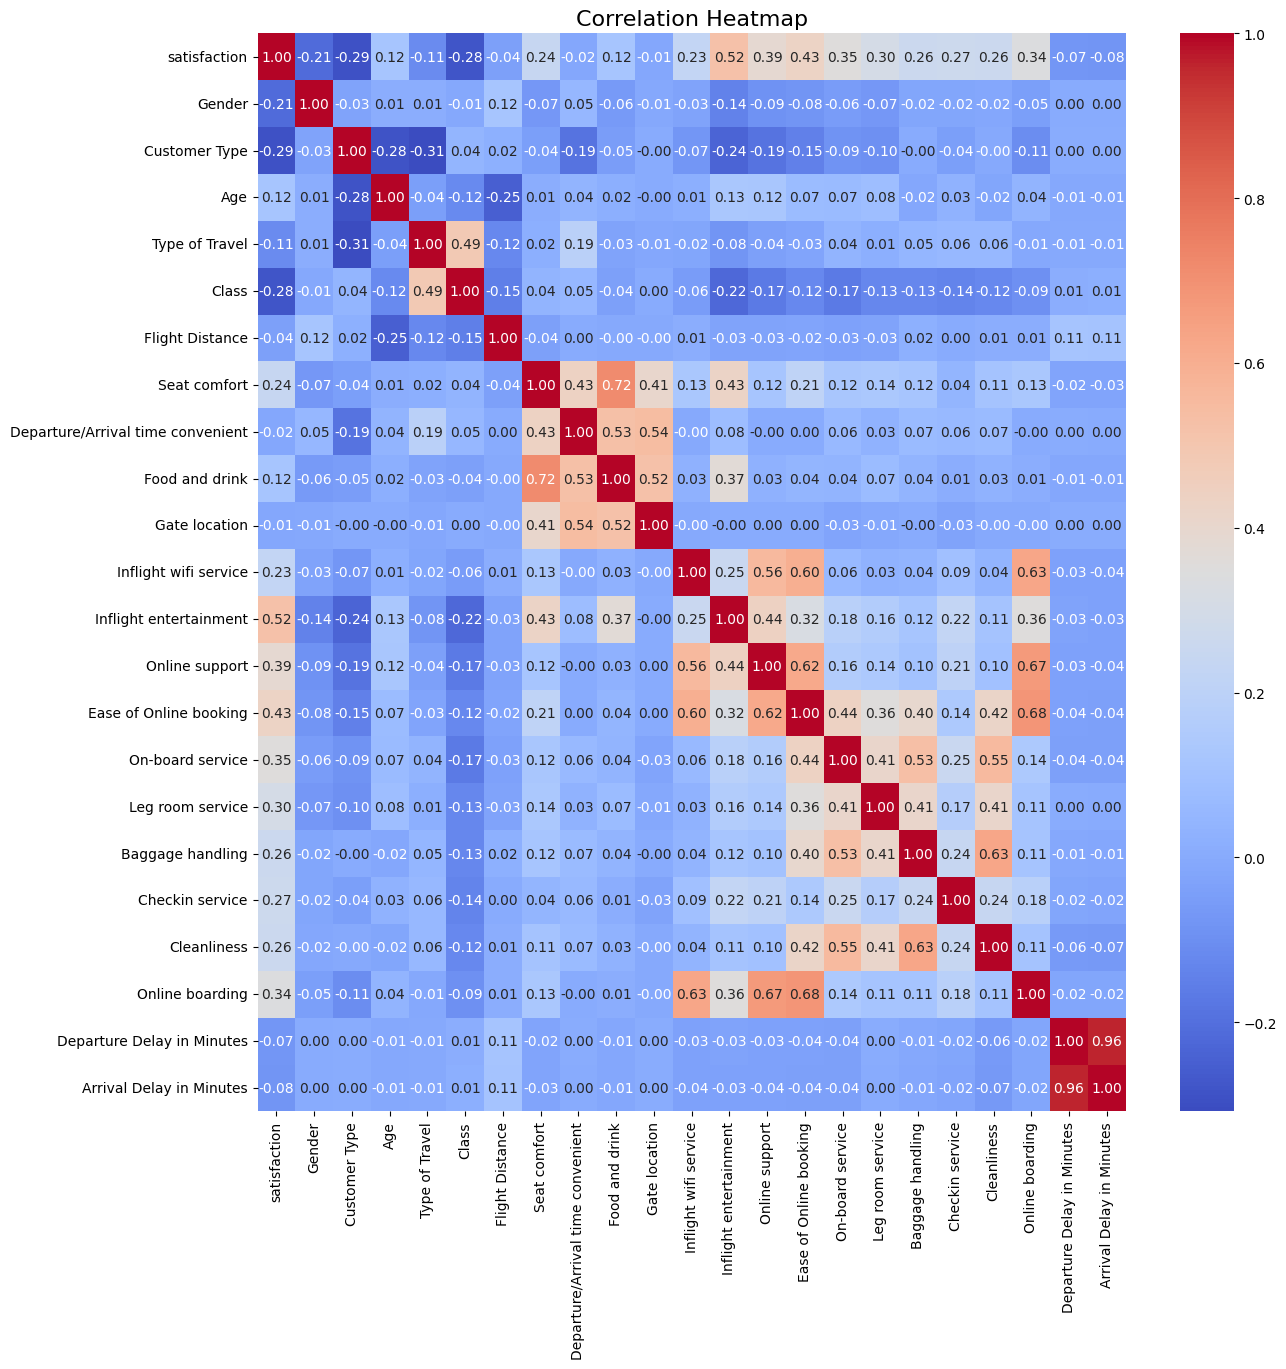

In [ ]:
correlation_matrix = df_combined.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Inflight entertainment and satisfaction has the strongest positive correlation. T
# This suggests that improving entertainment options significantly impacts overall satisfaction.
# Class and satisfaction has negative corellation.
# Further More, Gender, Age, Flight Distance, and Delays (Departure/Arrival)
# show little to no significant correlation with satisfaction. These factors may not be the primary drivers of passenger experience.
# Departure and arrival delay has the strongest corelation with 0.96

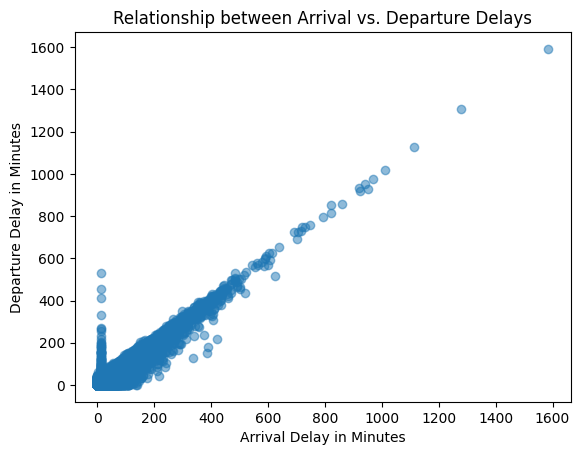

In [ ]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'], alpha=0.5)
plt.xlabel("Arrival Delay in Minutes")
plt.ylabel("Departure Delay in Minutes")
plt.title("Relationship between Arrival vs. Departure Delays")
plt.show()

# The points align along a straight line from the lower left to the upper right, indicating a roughly linear relationship between departure and arrival delays.
# This show that, as a delay at departure typically results in a similar delay at arrival unless time is made up during the flight.

# **Clustering**

## K-Means Clustering

Text(0, 0.5, 'SSE')

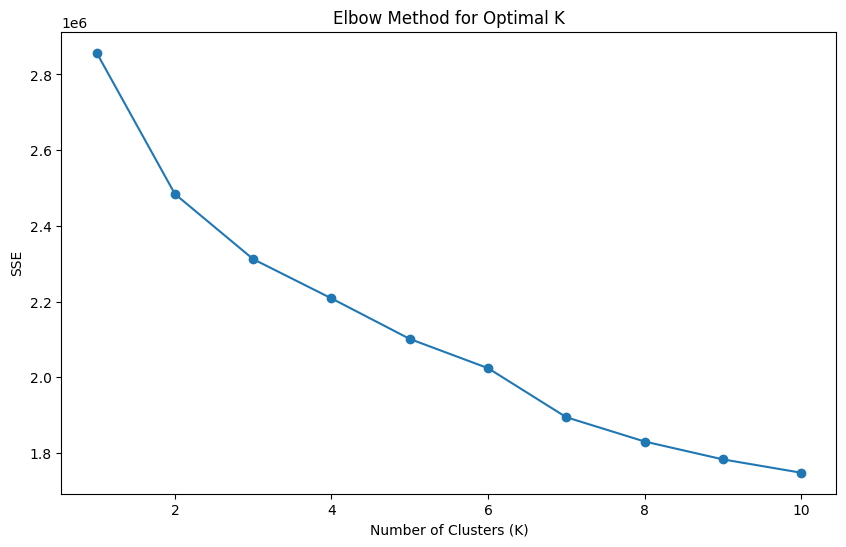

In [ ]:
## K-Means Clustering Elbow Method
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')

In [ ]:
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is:", kneedle.elbow)

The best k for your model is: 7


In [ ]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, init='random', max_iter=300, n_init= 300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

array([0, 6, 1, ..., 6, 6, 6], dtype=int32)

In [ ]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df_inverse['Cluster'] = y_pred
df_inverse.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Cluster
0,0.0,0.0,65.0,1.0,1.0,265.0,0.0,0.0,0.0,2.0,2.0,4.000000e+00,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0,0
1,1.0,0.0,47.0,1.0,0.0,2464.0,0.0,0.0,0.0,3.0,0.0,2.000000e+00,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0,6
2,0.0,0.0,15.0,1.0,1.0,2138.0,0.0,0.0,0.0,3.0,2.0,-4.440892e-16,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0,1
3,0.0,0.0,60.0,1.0,1.0,623.0,0.0,0.0,0.0,3.0,3.0,4.000000e+00,3.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0,0
4,0.0,0.0,70.0,1.0,1.0,354.0,0.0,0.0,0.0,3.0,4.0,3.000000e+00,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0,0


In [ ]:
cluster_summary = df_inverse.groupby(y_pred).agg({
    'Gender': [pd.Series.mode, 'min', 'max'],
    'Customer Type': [pd.Series.mode, 'min', 'max'],
    'Age': ['mean', 'min', 'max'],
    'Type of Travel': [pd.Series.mode, 'min', 'max'],
    'Class': [pd.Series.mode, 'min', 'max'],
    'Seat comfort': ['mean','min', 'max'],
    'Departure/Arrival time convenient': ['mean'],
    'Food and drink': ['mean'],
    'Gate location': ['mean'],
    'Inflight wifi service': ['mean'],
    'Inflight entertainment': ['mean'],
    'Online support': ['mean'],
    'Ease of Online booking': ['mean'],
    'On-board service': ['mean'],
    'Leg room service': ['mean'],
    'Baggage handling': ['mean',],
    'Checkin service': ['mean'],
    'Cleanliness': ['mean'],
    'Online boarding': ['mean'],
    'Departure Delay in Minutes': ['mean', 'min', 'max'],
    'Arrival Delay in Minutes': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis("KMeans")

cluster_summary_transposed = cluster_summary.T

new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")

cluster_summary_transposed

KMeans                                   Cluster 0   Cluster 1   Cluster 2   Cluster 3  \
Gender                            mode    0.000000    1.000000    0.000000    0.000000   
                                  min     0.000000    0.000000    0.000000    0.000000   
                                  max     1.000000    1.000000    1.000000    1.000000   
Customer Type                     mode    0.000000    0.000000    1.000000    0.000000   
                                  min     0.000000    0.000000    0.000000    0.000000   
                                  max     1.000000    1.000000    1.000000    1.000000   
Age                               mean   44.920893   33.222347   29.412615   38.181534   
                                  min     7.000000    7.000000    7.000000    7.000000   
                                  max    85.000000   85.000000   85.000000   80.000000   
Type of Travel                    mode    0.000000    0.000000    0.000000    1.000000   
                                  min     0.000000    0.000000    0.000000    0.000000   
                                  max     1.000000    1.000000    1.000000    1.000000   
Class                             mode    0.000000    1.000000    1.000000    1.000000   
                                  min     0.000000    0.000000    0.000000    0.000000   
                                  max     2.000000    2.000000    2.000000    2.000000   
Seat comfort                      mean    2.637970    2.368631    2.459788    3.343983   
                                  min     0.000000    0.000000    0.000000    0.000000   
                                  max     5.000000    5.000000    5.000000    5.000000   
Departure/Arrival time convenient mean    2.900534    2.970865    2.123564    3.707222   
Food and drink                    mean    2.828046    2.607472    2.435669    3.181962   
Gate location                     mean    2.936093    2.956535    2.977555    3.188524   
Inflight wifi service             mean    3.295476    1.608771    3.945979    3.799125   
Inflight entertainment            mean    3.396403    2.294125    2.442213    3.481860   
Online support                    mean    3.498243    1.708559    3.785513    3.970538   
Ease of Online booking            mean    2.645958    1.695788    3.955946    4.152672   
On-board service                  mean    2.148217    3.163254    3.140075    3.845441   
Leg room service                  mean    2.354407    3.217499    3.142966    3.724762   
Baggage handling                  mean    2.234400    3.648296    3.636384    4.073334   
Checkin service                   mean    2.757247    3.080133    3.119303    3.579638   
Cleanliness                       mean    2.255443    3.681112    3.649547    4.111888   
Online boarding                   mean    3.173187    1.599030    3.957772    3.921263   
Departure Delay in Minutes        mean   10.633131   10.687606   10.258921    9.544515   
                                  min     0.000000    0.000000    0.000000    0.000000   
                                  max   155.000000  198.000000  154.000000  174.000000   
Arrival Delay in Minutes          mean   11.167664   11.202166   10.782948    9.969197   
                                  min     0.000000    0.000000    0.000000    0.000000   
                                  max   141.000000  162.000000  150.000000  153.000000   

KMeans                                   Cluster 4   Cluster 5    Cluster 6  
Gender                            mode    0.000000    0.000000     1.000000  
                                  min     0.000000    0.000000     0.000000  
                                  max     1.000000    1.000000     1.000000  
Customer Type                     mode    0.000000    0.000000     0.000000  
                                  min     0.000000    0.000000     0.000000  
                                  max     1.000000    1.000000     1.000000  
Age                              

In [ ]:
# count data from each cluster
df_inverse['Cluster'].value_counts().sort_index()

,count
Cluster,
0,21907
1,23099
2,13143
3,23318
4,19783
5,25007
6,3623


interpretation for k-means:

Cluster 0:
Loyal business-class travelers (44 years old) with moderate satisfaction in seat comfort, cleanliness, and onboard service. Minimal delays.

Cluster 1:
Younger loyal business travelers (33 years old) on longer flights (2148 km) with decent satisfaction in onboard service but moderate wifi and seat comfort ratings. Minimal delays.

Cluster 2:
Younger travelers (29 years old) on shorter flights (2002 km) with moderate satisfaction across services, especially online booking and onboard service. Minimal delays.

Cluster 3:
Personal-purpose travelers (38 years old) on the shortest flights (1714 km) with high satisfaction in seat comfort and inflight entertainment. Minimal delays.

Cluster 4:
Older loyal travelers (48 years old) with balanced satisfaction across services. Mostly business trips with minimal delays.

Cluster 5:
Mixed travelers (43 years old) on the longest flights (2933 km) with moderate satisfaction but slightly higher delays than other clusters.

Cluster 6:
Travelers (38 years old) with significant arrival delays (185 minutes) but good satisfaction in inflight entertainment, seat comfort, and online boarding.


## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

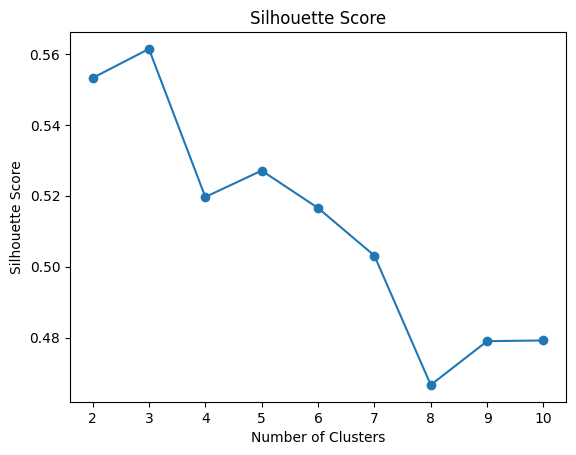

In [ ]:
# Using random sampling for downsampling to take a portion of the dataset.
df_sample = df_inverse.sample(n=10000, random_state=42)

silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_sample, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [ ]:
best_k = range(2,12)[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters is: {best_k}")

The best number of clusters is: 3


In [ ]:
# agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = agglo.fit_predict(df_sample)
y_hc

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
df_sample['Aglo']=y_hc
df_sample.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Cluster,Aglo
103044,0.0,0.0,59.0,0.0,0.0,1470.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,7.0,0.0,5,0
43282,0.0,1.0,22.0,0.0,1.0,1771.0,1.0,1.0,1.0,4.0,4.0,1.0,5.0,4.0,3.0,4.0,3.0,1.0,4.0,4.0,0.0,0.0,2,0
65543,1.0,0.0,55.0,0.0,0.0,3657.0,0.0,5.0,0.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,12.0,8.0,4,1
65083,0.0,0.0,41.0,0.0,0.0,1796.0,0.0,4.0,0.0,1.0,2.0,4.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0,0.0,0.0,4,0
76496,1.0,0.0,42.0,0.0,1.0,1709.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,1.0,3.0,2.0,0.0,0.0,1,0


In [ ]:
cluster_summary = df_sample.groupby(y_hc).agg({
    'Gender': [pd.Series.mode, 'min', 'max'],
    'Customer Type': [pd.Series.mode, 'min', 'max'],
    'Age': ['mean', 'min', 'max'],
    'Type of Travel': [pd.Series.mode, 'min', 'max'],
    'Class': [pd.Series.mode, 'min', 'max'],
    'Seat comfort': ['mean','min', 'max'],
    'Departure/Arrival time convenient': ['mean'],
    'Food and drink': ['mean'],
    'Gate location': ['mean'],
    'Inflight wifi service': ['mean'],
    'Inflight entertainment': ['mean'],
    'Online support': ['mean'],
    'Ease of Online booking': ['mean'],
    'On-board service': ['mean'],
    'Leg room service': ['mean'],
    'Baggage handling': ['mean',],
    'Checkin service': ['mean'],
    'Cleanliness': ['mean'],
    'Online boarding': ['mean'],
    'Departure Delay in Minutes': ['mean', 'min', 'max'],
    'Arrival Delay in Minutes': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis("Aglo")

cluster_summary_transposed = cluster_summary.T

new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="Aglo")

cluster_summary_transposed

Aglo                                     Cluster 0   Cluster 1   Cluster 2
Gender                            mode    1.000000    1.000000    0.000000
                                  min     0.000000    0.000000    0.000000
                                  max     1.000000    1.000000    1.000000
Customer Type                     mode    0.000000    0.000000    0.000000
                                  min     0.000000    0.000000    0.000000
                                  max     1.000000    1.000000    1.000000
Age                               mean   36.250042   37.262620   47.956985
                                  min     7.000000    8.000000    7.000000
                                  max    85.000000   85.000000   80.000000
Type of Travel                    mode    0.000000    0.000000    0.000000
                                  min     0.000000    0.000000    0.000000
                                  max     1.000000    1.000000    1.000000
Class                             mode    1.000000    0.000000    0.000000
                                  min     0.000000    0.000000    0.000000
                                  max     2.000000    2.000000    2.000000
Seat comfort                      mean    2.812723    2.736779    2.962311
                                  min     0.000000    0.000000    0.000000
                                  max     5.000000    5.000000    5.000000
Departure/Arrival time convenient mean    3.020526    2.966346    2.997952
Food and drink                    mean    2.818830    2.894231    2.905776
Gate location                     mean    2.996438    2.985577    2.981565
Inflight wifi service             mean    3.202205    3.354567    3.293732
Inflight entertainment            mean    3.189313    3.576923    3.705449
Online support                    mean    3.396268    3.632812    3.740680
Ease of Online booking            mean    3.378965    3.555889    3.638263
On-board service                  mean    3.420696    3.503005    3.610406
Leg room service                  mean    3.425785    3.519231    3.644818
Baggage handling                  mean    3.698728    3.700120    3.703810
Checkin service                   mean    3.300594    3.334135    3.407620
Cleanliness                       mean    3.705004    3.722957    3.714052
Online boarding                   mean    3.296183    3.420673    3.433429
Departure Delay in Minutes        mean   15.455980   21.150240   10.709136
                                  min     0.000000    0.000000    0.000000
                                  max   430.000000  933.000000  127.000000
Arrival Delay in Minutes          mean   16.031075   21.664336   11.412872
                                  min     0.000000    0.000000    0.000000
                                  max   438.000000  920.000000  125.000000

Conclusion

•	Cluster 0 represents younger, business travelers who are moderately satisfied with services and experience shorter delays.

•	Cluster 1 includes slightly older passengers who are less satisfied with seat comfort but rate inflight services better, though they experience the longest delays.

•	Cluster 2 is composed of older passengers who are more satisfied with most services and experience the least delays.

In Conclusion Cluster 2 passengers might be the most satisfied overall, while Cluster 1 passengers might need better delay management to improve their experience.

ward linkage

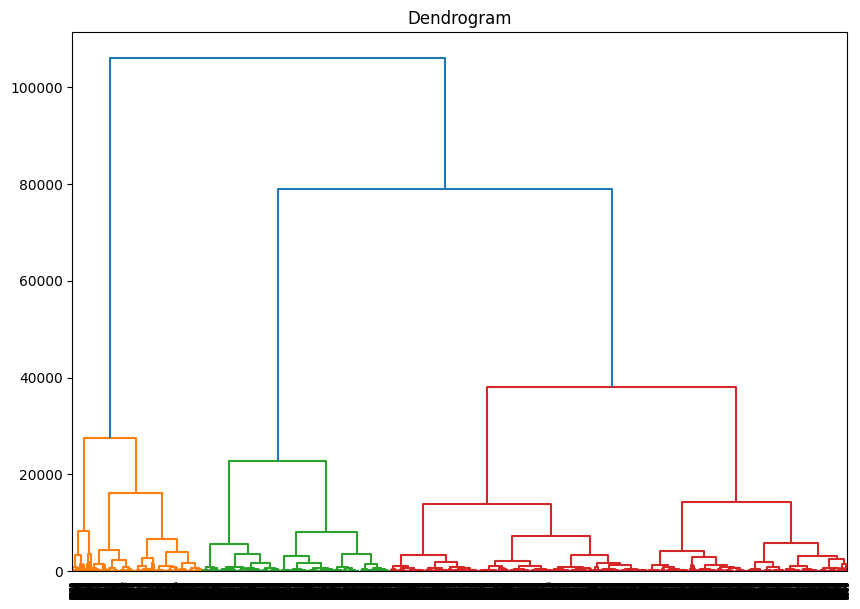

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_sample, method='ward'))
plt.show()

average linkage

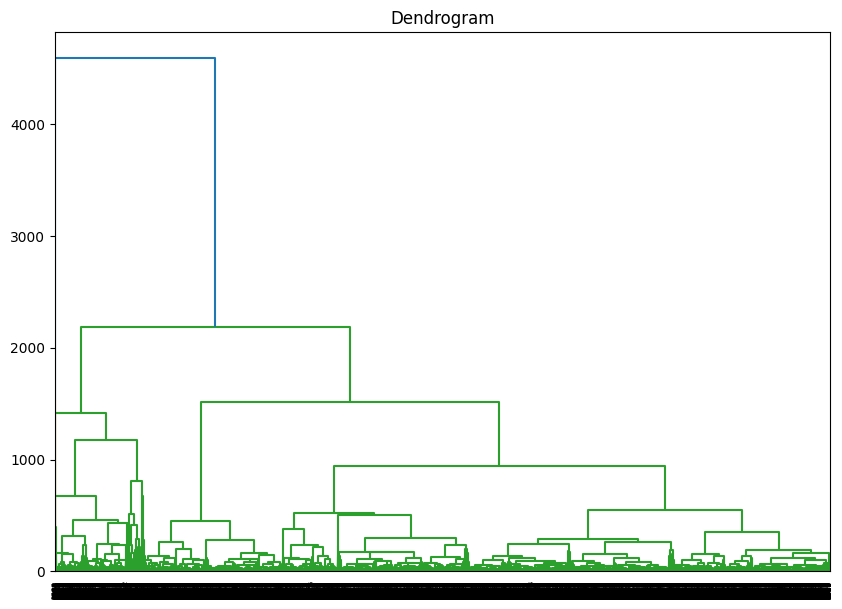

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_sample, method='average'))
plt.show()

complete linkage

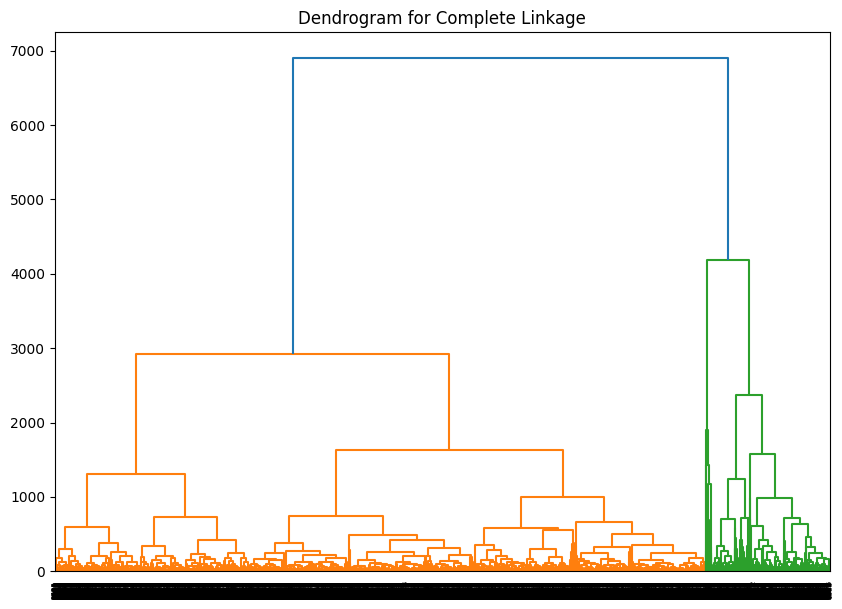

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(df_sample, method='complete'))
plt.show()

# **Classification**
## Machine Learning

In [ ]:
X = df_combined.drop('satisfaction', axis=1)
y = df_combined['satisfaction']

# df_combined adalah data yang telah di konversi menjadi numerik.
# y adalah target variabel/ variabel yang di prediksi dan X adalah variabel yang memprediksi target

In [ ]:
smote_enn = SMOTEENN(random_state=42)

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

# menggunakan smoteen untuk menggabungkan keuntungan dari oversampling (peningkatan data kelas minoritas) dan undersampling (pembersihan kelas mayoritas).
# SMOTE (Synthetic Minority Oversampling Technique): meningkatkan jumlah sampel kelas minoritas agar distribusinya lebih seimbang dengan kelas mayoritas.
# ENN (Edited Nearest Neighbors): Menghapus sampel yang dianggap tidak relevan atau berpotensi menyebabkan kebingungan.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Class distribution after SMOTEEN:
satisfaction
0    32630
1    29836
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# memisiah data menjadi 20% untuk testing dan 80% untuk training

In [ ]:
print(X_train.shape)
print(X_test.shape)

# Untuk X_train terdapat 103904 baris dan terdapat 6 column untuk training data.
# Untuk X_test terdapat 25976 baris dan terdapat  6 column untuk testing data.

(49972, 22)
(12494, 22)


## Desicion Tree


---
Using Entropy


In [ ]:
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_entropy = model_entropy.predict(X_test)

In [ ]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy:", accuracy_entropy)

Model accuracy score with criterion entropy: 0.9230030414599008


In [ ]:
y_train_pred_entropy = model_entropy.predict(X_train)
accuracy_train_entropy = accuracy_score(y_train, y_train_pred_entropy)
accuracy_test_entropy = accuracy_score(y_test, y_pred_entropy)
print("Train Accuracy:", accuracy_train_entropy)
print("Test Accuracy:", accuracy_test_entropy)

# Model ini berada pada fit yang baik karena performanya pada train dan test accuracy hampir sama
# Ini menunjukkan bahwa model mampu menangkap pola dengan baik tanpa overfitting atau underfitting

Train Accuracy: 0.9253181781797807
Test Accuracy: 0.9230030414599008


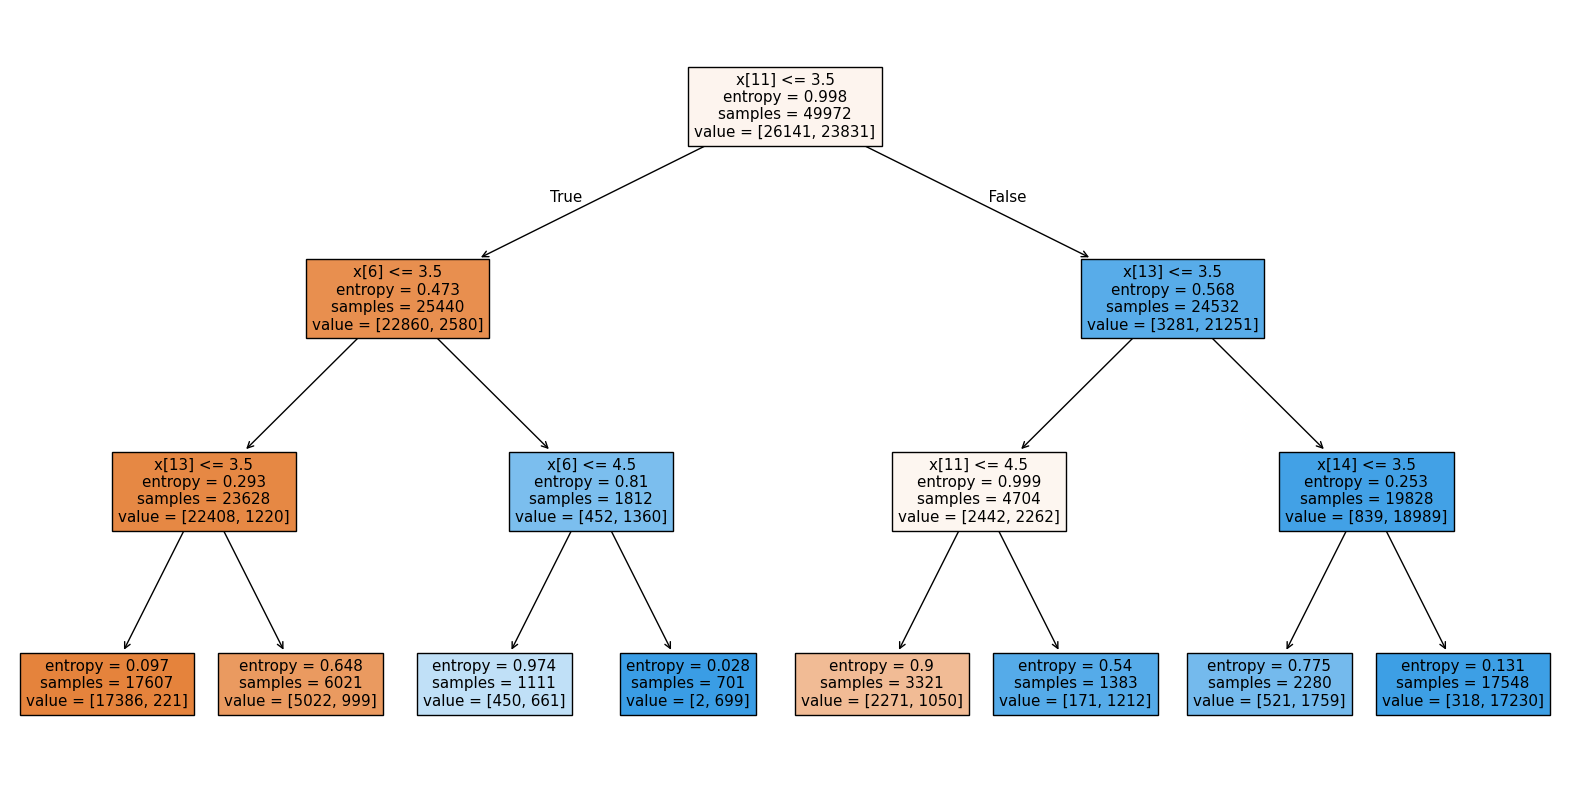

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_entropy, filled=True)
plt.show()

Using Gini

In [ ]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = model_gini.predict(X_test)

In [ ]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini:", accuracy_gini)

Model accuracy score with criterion gini: 0.929326076516728


In [ ]:
y_train_pred_gini = model_gini.predict(X_train)
accuracy_train_gini = accuracy_score(y_train, y_train_pred_gini)
accuracy_test_gini = accuracy_score(y_test, y_pred_gini)
print("Train Accuracy:", accuracy_train_gini)
print("Test Accuracy:", accuracy_test_gini)

# Model ini memiliki kondisi fit yang baik, karena performanya pada train dan test accuracy hampir sama dan memiliki akurasi tinggi.
# Model ini mampu menangkap pola dalam data dengan baik tanpa overfitting atau underfitting.

Train Accuracy: 0.9325822460577924
Test Accuracy: 0.929326076516728


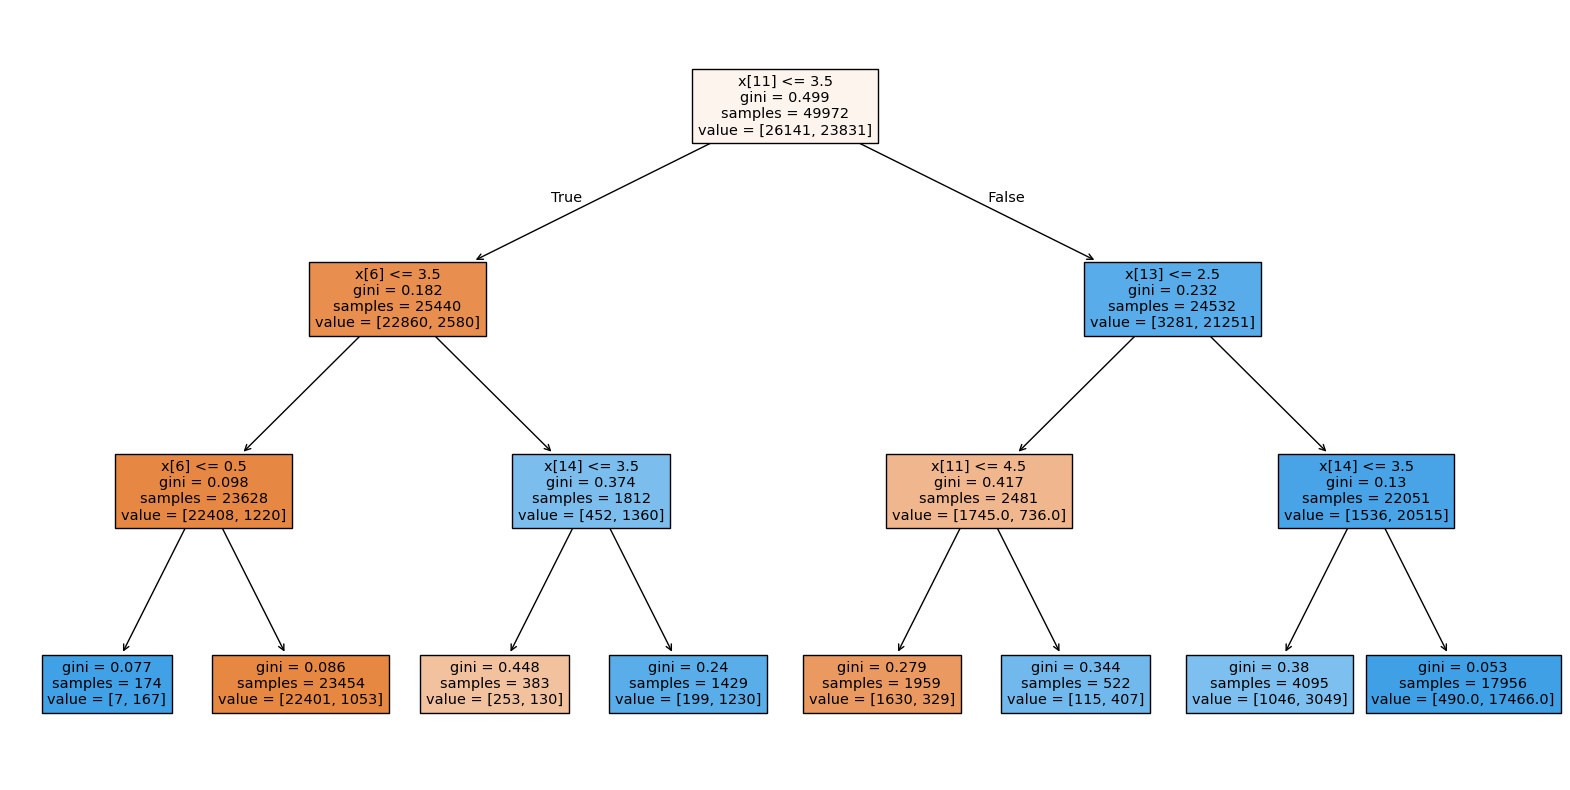

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_gini, filled=True)
plt.show()

In [ ]:
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:")
print(cm_entropy)
print("\nConfusion Matrix Gini:")
print(cm_gini)

# Menampilkan confusion matrix dari entropy dan gini index

Confusion Matrix Entropy:
[[6111  378]
 [ 584 5421]]

Confusion Matrix Gini:
[[6014  475]
 [ 408 5597]]


In [ ]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_entropy))
print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))

# Menampilkan classification report dari entropy dan gini index.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6489
           1       0.93      0.90      0.92      6005

    accuracy                           0.92     12494
   macro avg       0.92      0.92      0.92     12494
weighted avg       0.92      0.92      0.92     12494


Classification Report Gini
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6489
           1       0.92      0.93      0.93      6005

    accuracy                           0.93     12494
   macro avg       0.93      0.93      0.93     12494
weighted avg       0.93      0.93      0.93     12494



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=359)
model_knn.fit(X_train, y_train)

# menggunakan model KNN dan menggunakan N sebesar 359

KNeighborsClassifier(n_neighbors=359)

In [ ]:
y_pred_knn = model_knn.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Model accuracy score with KNN:", accuracy_knn)

Model accuracy score with KNN: 0.758364014727069


In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix KNN:")
print(cm_knn)

Confusion Matrix KNN:
[[5108 1381]
 [1638 4367]]


In [ ]:
print("Classification Report KNN")
print(classification_report(y_test, y_pred_knn))

Classification Report KNN
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      6489
           1       0.76      0.73      0.74      6005

    accuracy                           0.76     12494
   macro avg       0.76      0.76      0.76     12494
weighted avg       0.76      0.76      0.76     12494



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy_rf= accuracy_score(y_test, y_pred_rf)
print("Model accuracy score with Random Forest:", accuracy_rf)

Model accuracy score with Random Forest: 0.9846326236593564


In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix Random Forest:")
print(cm_rf)

Confusion Matrix Random Forest:
[[6393   96]
 [  96 5909]]


In [ ]:
print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6489
           1       0.98      0.98      0.98      6005

    accuracy                           0.98     12494
   macro avg       0.98      0.98      0.98     12494
weighted avg       0.98      0.98      0.98     12494



## Result & Conclusion

Confusion matrix

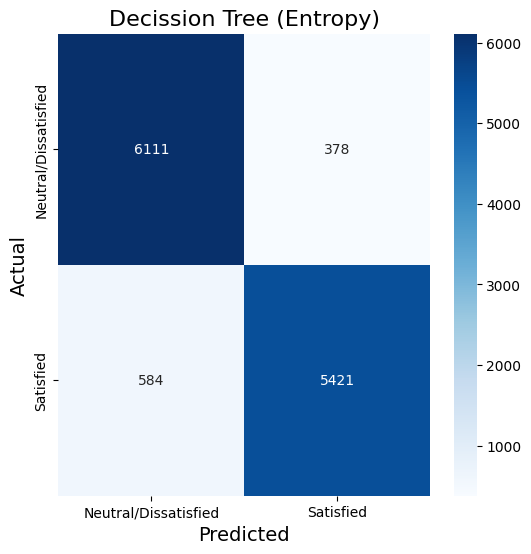

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_entropy)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('Decission Tree (Entropy)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

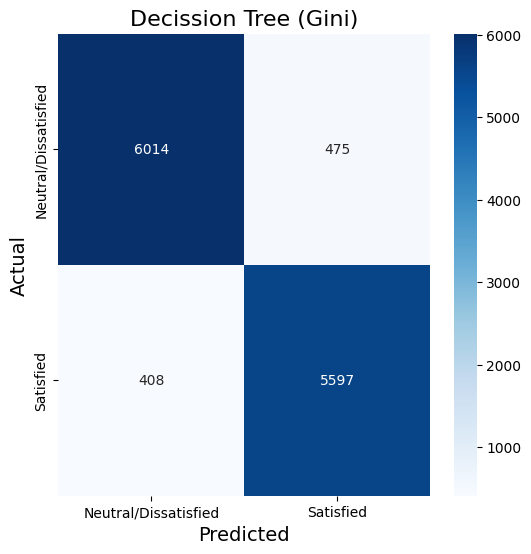

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('Decission Tree (Gini)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

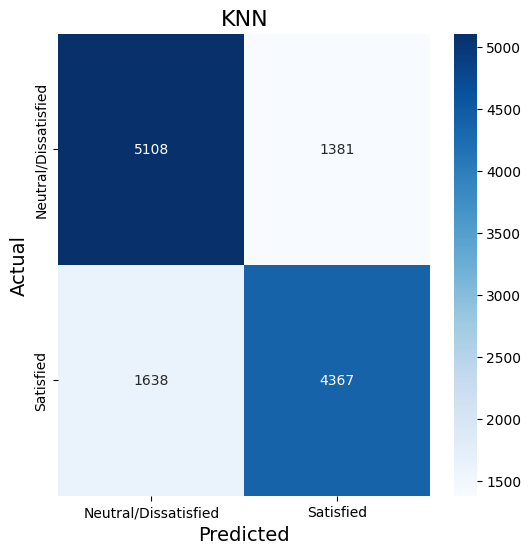

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('KNN', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

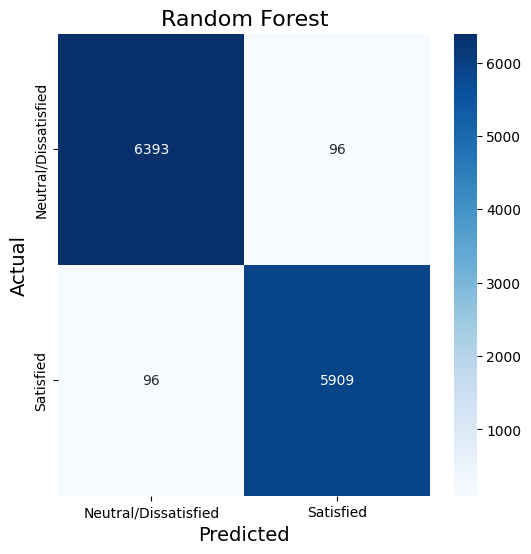

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

Classification report

In [ ]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_entropy))
print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))
print("\nClassification Report KNN")
print(classification_report(y_test, y_pred_knn))
print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6489
           1       0.93      0.90      0.92      6005

    accuracy                           0.92     12494
   macro avg       0.92      0.92      0.92     12494
weighted avg       0.92      0.92      0.92     12494


Classification Report Gini
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6489
           1       0.92      0.93      0.93      6005

    accuracy                           0.93     12494
   macro avg       0.93      0.93      0.93     12494
weighted avg       0.93      0.93      0.93     12494


Classification Report KNN
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      6489
           1       0.76      0.73      0.74      6005

    accuracy                           0.76     12494
   macro avg       0.76      0.76      0.76

- Best Model: Random Forest is the best-performing model with a 98% accuracy and a near-perfect balance in precision, recall, and F1-score for both classes. This makes it highly reliable for predicting customer satisfaction.
- Second Best: Both Decision Tree (Entropy and Gini) performed similarly with an accuracy of 93%, but Gini performed slightly better due to balanced recall between classes.
- Worst Model: KNN showed the weakest performance with only 76% accuracy, low precision, and recall, making it unsuitable for this dataset.